<a href="https://colab.research.google.com/github/massirism/ML-UNS/blob/main/Tp4_Massiris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#Haré el clasificador de noticias.

In [18]:
import pandas as pd
#Noticias correctas
true_news = pd.read_csv("https://raw.githubusercontent.com/emmanueliarussi/DataScienceCapstone/master/3_MidtermProjects/ProjectFN/data/true.csv")
#true_news.head()

#Agrego una columna extra para mostrar que son las noticias verdaderas
true_news.insert(4,"target",1, allow_duplicates=False) #Agrego una cuarta columna de target=0 porque las noticias son falsas.
true_news.head()
print(len(true_news))

21417


In [16]:
#Noticias falsas.
fake_news = pd.read_csv("https://raw.githubusercontent.com/emmanueliarussi/DataScienceCapstone/master/3_MidtermProjects/ProjectFN/data/fake.csv")
#fake_news.head()
#Agrego una columna extra para mostrar que son los falsos
fake_news.insert(4,"target",0, allow_duplicates=False) #Agrego una cuarta columna de target=0 porque las noticias son falsas.
fake_news.head()
print(len(fake_news))

23481


In [21]:
import numpy as np
import pandas as pd
import sklearn
import itertools
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.utils import shuffle

Para resolver este problema usaré un clasificador pasivo-agresivo. Un algoritmo de este tipo permanece pasivo para un resultado de clasificación correcto, y se vuelve agresivo en caso de un error de cálculo, actualizándose y ajustándose. A diferencia de la mayoría de los demás algoritmos, no converge. Su objetivo es realizar actualizaciones que corrijan la pérdida, provocando muy pocos cambios en la norma del vector de pesos.

Entonces está provocando pequeños cambios en cada perceptrón para corregir la perdida.

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.PassiveAggressiveClassifier.html

A su vez también usaré este método que alguna vez mencionó el profesor Claudio para clasificar las fake news.

IDF (Inverse Document Frequency): Las palabras que aparecen muchas veces en un documento, pero que también aparecen muchas veces en otros, pueden ser irrelevantes. El IDF es una medida de la importancia de un término en todo el corpus.

El TfidfVectorizer convierte una colección de documentos en bruto en una matriz de características TF-IDF.

In [24]:
#Pondré las buenas noticias y las falsas en un solo df.
df=pd.concat([fake_news,true_news])
df.shape
#df.head()
df_aux=df
#Con esto los mezclo
df = shuffle(df)
#print(len(df))
df.head()

,title,text,subject,date,target
16363,"German coalition talks stumble on migration, c...",BERLIN (Reuters) - Three German parties resign...,worldnews,"October 26, 2017",1
431,Pastor Who Prayed At Trump’s Inauguration Tak...,"Donald Trump s decision to punish 800,000 youn...",News,"September 5, 2017",0
9416,Senator Durbin cites problems with House Puert...,WASHINGTON (Reuters) - U.S. Senator Dick Durbi...,politicsNews,"May 24, 2016",1
5947,Trump’s Spokeswoman Just Said Half Of Bernie’...,Infamous Donald Trump spokeswoman Katrina Pier...,News,"June 9, 2016",0
1302,Business leaders say no NAFTA better than bad ...,MEXICO CITY (Reuters) - Business leaders atten...,politicsNews,"October 12, 2017",1


In [26]:
#DataFlair - Get the labels
labels=df.target
labels.head()

16363    1
431      0
9416     1
5947     0
1302     1
Name: target, dtype: int64

In [27]:
#Ahora hago el split de los datos!
x_train,x_test,y_train,y_test=train_test_split(df['text'], labels, test_size=0.2, random_state=7) #Le paso el texto y la variable target, es lo más importante.
#Después podría agregar el título a ver si mejora o no el clasificador.

#Como coloqué test_size=0.2 el 20% de los datos serán para realizar el testeo!

Ahora usaré un TfidfVectorizer con **stopwords** del idioma inglés y una frecuencia de documento máxima de 0,7 (los términos con una frecuencia de documento mayor se descartarán). 

**STOP WORDS**:Palabras vacías es el nombre que reciben las palabras sin significado como artículos, pronombres, preposiciones, etc. que son filtradas antes o después del procesamiento de datos en lenguaje natural. En inglés por ejemplo sería: the, to, do, etc...

In [28]:
#Initializo el TfidfVectorizer
tfidf_vectorizer=TfidfVectorizer(stop_words='english', max_df=0.7)

#Fit and transform con los datos de entrenamiento
tfidf_train=tfidf_vectorizer.fit_transform(x_train) 
#Ahora si uso los datos de validación o testeo
tfidf_test=tfidf_vectorizer.transform(x_test)

Hay que tener en cuenta que hay una función para los datos de entrenamiento y otra para los datos de testeo.

-Training data - fit_transform()

-Testing data - transform()

Documentación:

https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html#sklearn.feature_extraction.text.TfidfVectorizer.fit

Ahora inicializo un PassiveAggressiveClassifier.Lo ajustaré con **tfidf_train**(es el texto después de pasar por la filtración) y **y_train**.


In [29]:
#Initializo el PassiveAggressiveClassifier
pac=PassiveAggressiveClassifier(max_iter=50)
pac.fit(tfidf_train,y_train)

#Hago la predicción con los datos de testeo y calculo el accuracy
y_pred=pac.predict(tfidf_test)
score=accuracy_score(y_test,y_pred)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 99.63%


In [33]:
#Para terminar armo la matriz de confusión para ver los valores TP,FP,FN y TN.
ConfusionMatrix=confusion_matrix(y_test,y_pred, labels=[0,1])
print(ConfusionMatrix)

[[4634   24]
 [   9 4313]]


In [37]:
TP=ConfusionMatrix[0,0]
FP=ConfusionMatrix[0,1]
FN=ConfusionMatrix[1,0]
TN=ConfusionMatrix[1,1]
print("True positive:",str(TP),"\n")
print("False positive:",str(FP),"\n")
print("False negative:",str(FN),"\n")
print("True negative:",str(TN),"\n")

#Excelentes resultados!!

True positive: 4634 

False positive: 24 

False negative: 9 

True negative: 4313 



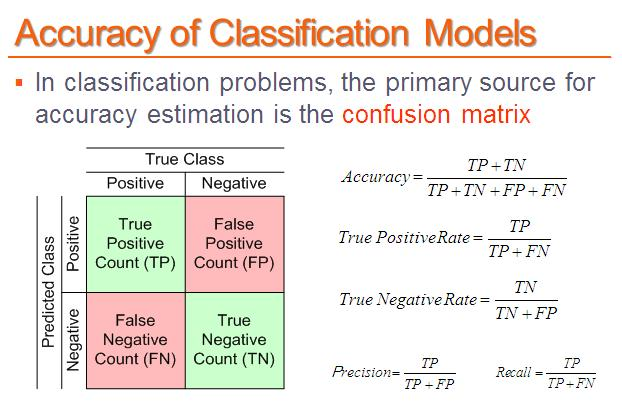